In [28]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set the desired figure size in inche
plt.rcParams['figure.figsize'] = (20, 12)  # Width: 8 inches, Height: 6 inches

#create my color array (viridis)
my_colors = ["#fde725",  "#90d743", "#35b779", "#21918c", "#31688e", "#443983", "#440154"]

my_colors = ["#fde725",   "#35b779",  "#31688e",  "#440154"]


# add color array to set_palette
sns.set_theme(font_scale=1.6, style="ticks", palette= my_colors)


In [16]:
def readWaterAge(FolderName):
    # Read the data from the csv file and store it in a variable
    myVar = pd.read_csv(FolderName, sep = ",", header = 0, decimal = ".", index_col = 'date and time', parse_dates=['date and time'])
    myVar.rename(columns = {'calculated  AGE  for water from source 1 (d)': 'WaterAge'}, inplace = True)
    myVar.index.names = ['Date']
    myVar.dropna()
    myVar = myVar.iloc[4284:]
    myVar['WaterAge'] = myVar['WaterAge'].astype(float)
    return myVar

In [17]:
def smoothMyVar(var, myWindow):    
   # Calculate the rolling mean and standard deviation for the variable
    roll = var.WaterAge.rolling(myWindow, center=True)
    mySmoothValues = roll.agg(['mean', 'std']) 
    return mySmoothValues

In [18]:
def plotSmootWaterAge(var, myWindow, myLabel):
    # Plot the rolling mean and standard deviation of the water age
    smoothValues = smoothMyVar(var, myWindow)
        
    ax = smoothValues['mean'].plot(linewidth=3, label= myLabel)            
    ax.fill_between(smoothValues.index, smoothValues['mean'] - smoothValues['std'], 
                    smoothValues['mean'] + smoothValues['std'], alpha=0.2)
          
    plt.tight_layout()
    plt.ylabel("Age trazer (days)", size = 28)
    plt.xlabel('Time (years)', size = 28)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.legend() 
          
    return ax

In [19]:
def date2deltaTime(var):
    # Calculate the time in years from the first data point
    ser_diff = var.index.to_series().diff()
    var['deltaT'] = ser_diff.dt.seconds.div(60, fill_value=0)
    var['deltaT'] = ((var['deltaT'].cumsum()))/(60*24*365)
    var.set_index('deltaT', inplace=True)
    return var   

In [26]:
def plotTerminosAgesZones(path, myWindow):
    # Read each area of the lagoon and plot the water age time series

    PRealFile = path + '01_PReal_inlet.csv'
    
    CarmenInletFile = path + '07_CarmenInlet.csv'   

    PRealAge = readWaterAge(PRealFile)
    
    CarmenInletAge = readWaterAge(CarmenInletFile)
   
    CandelariaFile = path + '02_Candelaria.csv'

    ChumpanFile = path + '03_Chumpan.csv'

    CentertFile = path + '04_lagoonCenter.csv'

    CarmenIslandFile = path + '05_CarmenIsland.csv'

    PalizadaFile = path + '06_Palizada.csv'   
                                 
    CandelariaAge = readWaterAge(CandelariaFile)
   
    ChumpanAGe = readWaterAge(ChumpanFile)

    CarmenIslandAge = readWaterAge(CarmenIslandFile)

    PalizadaAge = readWaterAge(PalizadaFile)

    CenterAge = readWaterAge(CentertFile)

    plotSmootWaterAge(CandelariaAge, myWindow, "Candelaria")

    plotSmootWaterAge(ChumpanAGe, myWindow, "Chumpan")

    plotSmootWaterAge(CenterAge, myWindow, "Lagoon Center")

    plotSmootWaterAge(CarmenIslandAge, myWindow, "Carmen Island")

    #plotSmootWaterAge(PalizadaAge, myWindow, "Palizada")

    #plotSmootWaterAge(CarmenInletAge , myWindow, "Carmen Inlet")

    #plotSmootWaterAge(PRealAge, myWindow, "Puerto Real Inlet")
    
    # Save figures 
    plt.savefig('..\\output_files\\age_areas.pdf', dpi=600, format='pdf', metadata={'Author': 'Cardoso-Mohedano JG, 2023'})

    #plt.savefig('single_column_figure.tiff', format='tiff')

 
    plt.show()


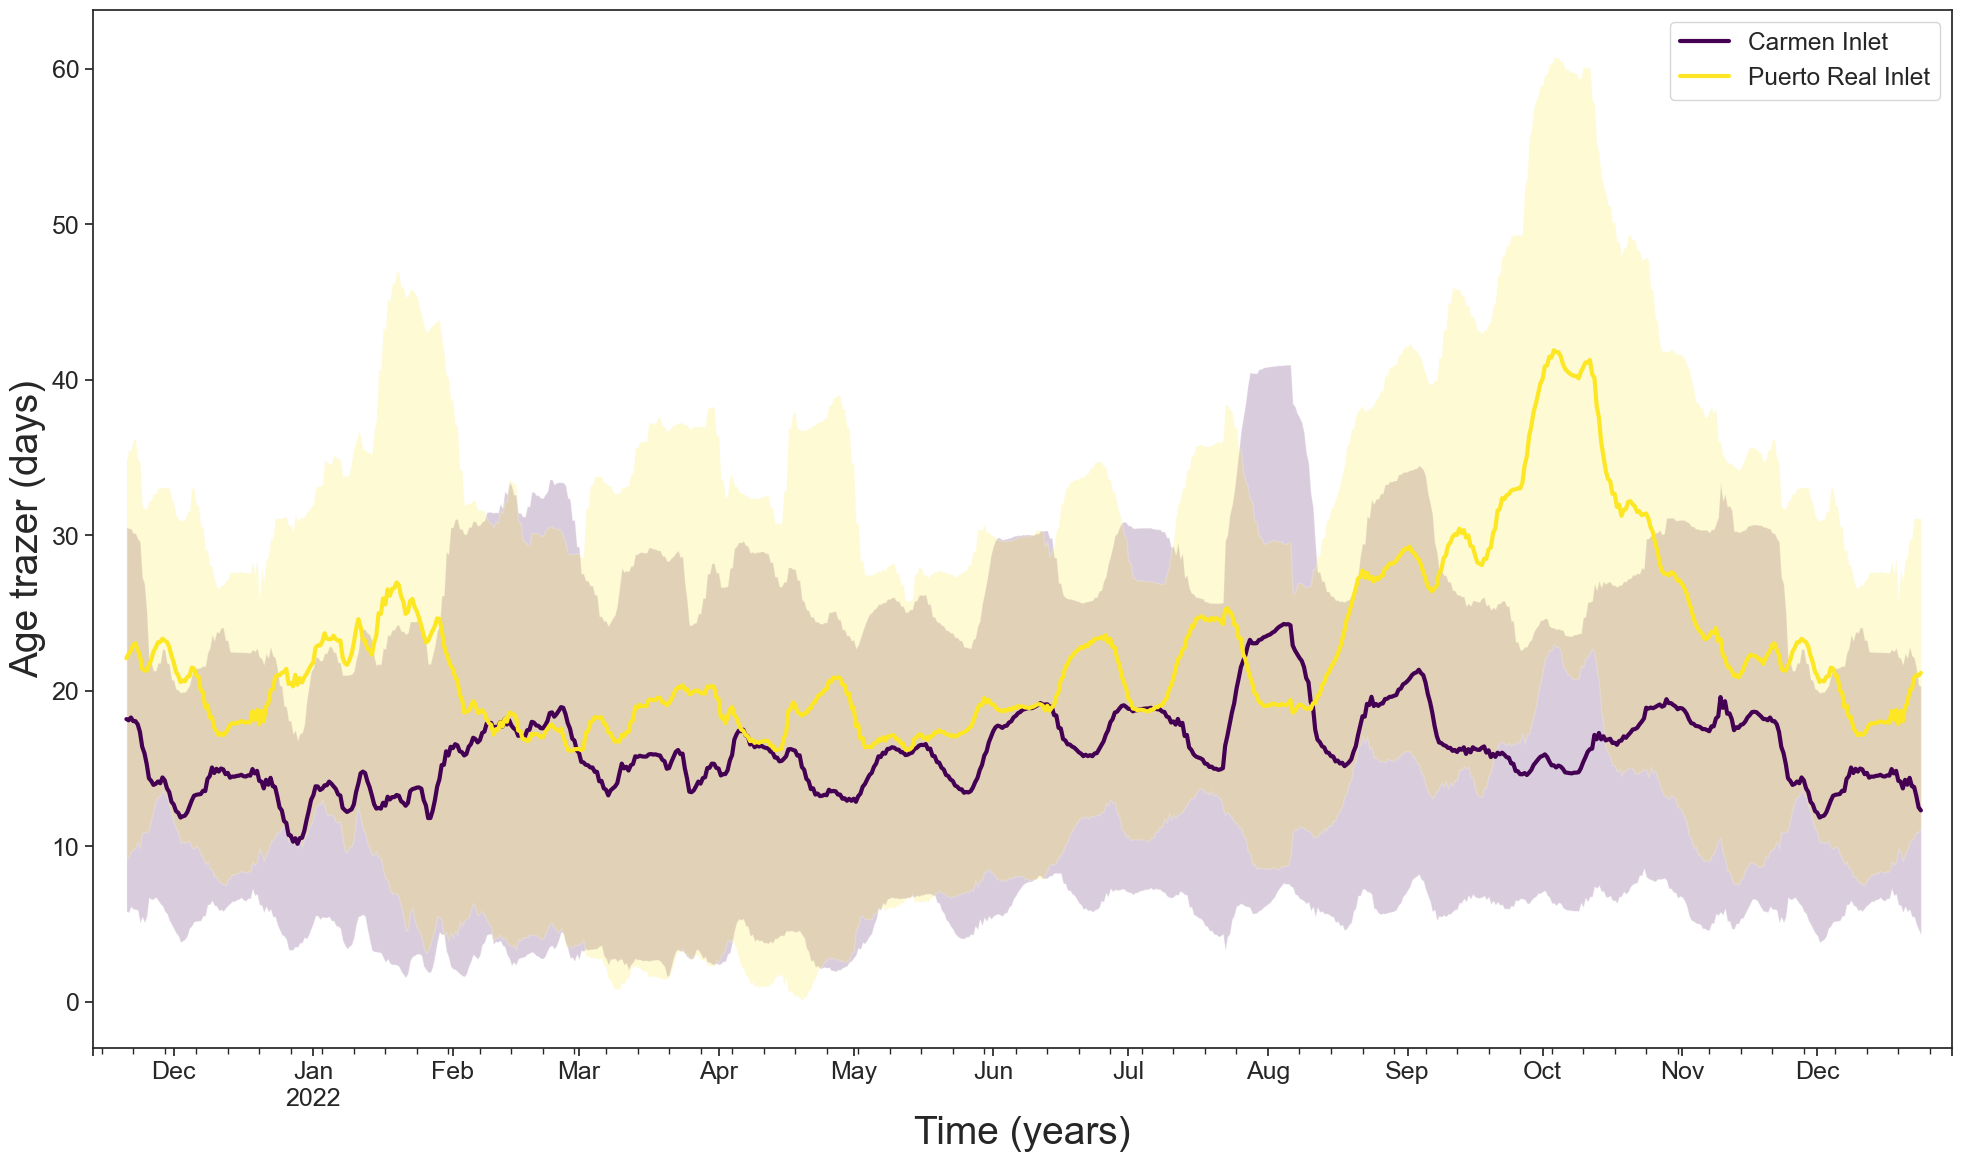

In [29]:
myPath = '..\\data\\AGE\\'

window = 30


plotTerminosAgesZones(myPath, window)

